# Homework 2: Gradient Descent & Regularization

**<font color=purple size=3>DS-GA-1003 - Spring 2021 </font>** 

Boyang Yu, by2026

## 1 Gradient descent for ridge(less) linear regression

**<font color=purple size=3>Feature normalization</font>**

1. Modify function _feature\_normalization_ to normalize all the features to [0, 1]. Can you use numpy’s broadcasting here? Often broadcasting can help to simplify and/or speed up your code. Note that a feature with constant value cannot be normalized in this way. Your function should discard features that are constant in the training set.

<font color=purple size=3>Ans.</font>

<font color=purple size=2>I use Min-max normalization in the function. Broadcasting is applied in the coding by ndarray.min(axis=0), ndarray.max(axis=0), and the minus operation. </font>



In [1]:
import sys,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def feature_normalization(train, test):
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size(num_instances, num_features)
        test - test set, a 2D numpy array of size(num_instances, num_features)

    Returns:
        train_normalized - training set after normalization
        test_normalized - test set after normalization
    """
    # TODO
    non_const_col = []
    for i in range(train.shape[1]):
        if np.std(train[:,i])>1e-6:
            non_const_col.append(i)
    scaled_train = (train[:,non_const_col] - train[:,non_const_col].min(axis=0)) / (train[:,non_const_col].max(axis=0) - train[:,non_const_col].min(axis=0))
    scaled_test = (test[:,non_const_col] - train[:,non_const_col].min(axis=0)) / (train[:,non_const_col].max(axis=0) - train[:,non_const_col].min(axis=0))
    return scaled_train,scaled_test

In [73]:
def load_data():
    #Loading the dataset
    print('loading the dataset')

    df = pd.read_csv('./ridge_regression_dataset.csv', delimiter=',')
    X = df.values[:,:-1]
    y = df.values[:,-1]

    print('Split into Train and Test')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)

    print("Scaling all to [0, 1]")
    X_train, X_test = feature_normalization(X_train, X_test)
    X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
    X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()
print(X_train.max(),X_test.max())

loading the dataset
Split into Train and Test
Scaling all to [0, 1]
1.0 1.0076981096115134


**<font color=purple size=3>Linear regression</font>**

2. Let $X \in \mathbb{R}^{m\times\left(d+1\right)}$ be the _design matrix_, where the $i$'th row of $X$ is $x_{i}$. Let $y=\left(y_{1},\ldots,y_{m}\right)^{T}\in\mathbb{R}^{m\times1}$
be the _response_. Write the objective function $J(\theta)$ as
a matrix/vector expression, without using an explicit summation sign.

<font color=purple size=3>Ans.</font>

<font color=purple size=2>$J(\theta)= \frac{1}{m}(X\theta - y)^T (X\theta - y)$
</font>

3. Write down an expression for the gradient of $J$ without using an explicit summation sign.

<font color=purple size=3>Ans.</font>

<font color=purple size=2>$\nabla_{\theta} J(\theta)= \frac{1}{m}\nabla((X\theta - y)^T (X\theta - y))
=\frac{1}{m}(\nabla_{\theta}(\theta^T X^T X\theta) -\nabla_{\theta}( y^TX\theta)-\nabla_{\theta}(\theta^T X^T y) + \nabla_{\theta}(y^Ty))
=\frac{1}{m}(2 X^T X\theta - X^T y - X^T y+0) 
=\frac{2}{m} X^T(X\theta-y)$
</font>

4. Write down the expression for updating $\theta$ in the gradient descent algorithm for a step size $\eta$.

<font color=purple size=3>Ans.</font>

<font color=purple size=2>$\theta_{new} = \theta_{old} - \eta \nabla_{\theta_{old}} J(\theta_{old})
= \theta_{old} -\frac{2\eta}{m} X^T(X\theta_{old}-y)$
</font>


5. Modify the function _compute\_square\_loss_, to compute $J(\theta)$for a given $\theta$. You might want to create a small dataset for which you can compute $J(\theta)$ by hand, and verify that your _compute\_square\_loss_ function returns the correct value.

<font color=purple size=3>Ans.</font>


In [4]:
#######################################
### The square loss function
def compute_square_loss(X, y, theta):
    """
    Given a set of X, y, theta, compute the average square loss for predicting y with X*theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D array of size(num_features)

    Returns:
        loss - the average square loss, scalar
    """
    return ((X@theta-y).T)@(X@theta-y)/X.shape[0]
    

X = np.array([[1,1],[0,2],[1,0]])
theta = np.array([2,2.5])
y = np.array([2,2.5,2])
compute_square_loss(X, y, theta)

4.166666666666667

6. Modify the function _compute\_square\_loss\_gradient_, to compute $\nabla_{\theta}J(\theta)$. You may again want to use a small dataset to verify that your _compute\_square\_loss\_gradient_ function returns the correct value.

<font color=purple size=3>Ans.</font>


In [5]:
#######################################
### The gradient of the square loss function
def compute_square_loss_gradient(X, y, theta):
    """
    Compute the gradient of the average square loss(as defined in compute_square_loss), at the point theta.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    return 2*(X.T)@(X@theta-y)/X.shape[0]

compute_square_loss_gradient(X, y, theta)

array([1.66666667, 5.        ])

**<font color=purple size=3>Gradient checker</font>**

7. Complete the function _grad\_checker_ according to the documentation of the function given in the _skeleton\_code.py_. Alternatively, you may complete the function _generic\_grad\_checker_ which can work for any objective function.

<font color=purple size=3>Ans.</font>



In [6]:
#######################################
### Gradient checker
#Getting the gradient calculation correct is often the trickiest part
#of any gradient-based optimization algorithm. Fortunately, it's very
#easy to check that the gradient calculation is correct using the
#definition of gradient.
#See http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
def grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4):
    """Implement Gradient Checker
    Check that the function compute_square_loss_gradient returns the
    correct gradient for the given X, y, and theta.

    Let d be the number of features. Here we numerically estimate the
    gradient by approximating the directional derivative in each of
    the d coordinate directions:
(e_1 =(1,0,0,...,0), e_2 =(0,1,0,...,0), ..., e_d =(0,...,0,1))

    The approximation for the directional derivative of J at the point
    theta in the direction e_i is given by:
(J(theta + epsilon * e_i) - J(theta - epsilon * e_i)) /(2*epsilon).

    We then look at the Euclidean distance between the gradient
    computed using this approximation and the gradient computed by
    compute_square_loss_gradient(X, y, theta).  If the Euclidean
    distance exceeds tolerance, we say the gradient is incorrect.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        epsilon - the epsilon used in approximation
        tolerance - the tolerance error

    Return:
        A boolean value indicating whether the gradient is correct or not
    """
    true_gradient = compute_square_loss_gradient(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    # iterate through all n dimension
    for i in range(num_features):
        # construct e_i
        e_i = np.zeros(num_features)
        e_i[i] = 1
        # calcualte f(theta+epsilon) and f(theta-epsilon)
        f_plus = compute_square_loss(X, y, theta + e_i * epsilon)
        f_minus= compute_square_loss(X, y,theta - e_i * epsilon)
        # calculate the approximated gradient at dimension i
        approx_grad[i] = (f_plus-f_minus)/(2*epsilon)
    eu_dist = np.sqrt(np.power(true_gradient-approx_grad, 2).sum())
    if eu_dist<tolerance:
        #correct
        return True
    else:
        return False



#######################################
### Generic gradient checker
def generic_gradient_checker(X, y, theta, objective_func, gradient_func, 
                             epsilon=0.01, tolerance=1e-4):
    """
    The functions takes objective_func and gradient_func as parameters. 
    And check whether gradient_func(X, y, theta) returned the true 
    gradient for objective_func(X, y, theta).
    Eg: In LSR, the objective_func = compute_square_loss, and gradient_func = compute_square_loss_gradient
    """
    #TODO
    true_gradient = gradient_func(X, y, theta) #The true gradient
    num_features = theta.shape[0]
    approx_grad = np.zeros(num_features) #Initialize the gradient we approximate
    
    # iterate through all n dimension
    for i in range(num_features):
        # construct e_i
        e_i = np.zeros(num_features)
        e_i[i] = 1
        # calcualte f(theta+epsilon) and f(theta-epsilon)
        f_plus = objective_func(X, y, theta + e_i * epsilon)
        f_minus= objective_func(X, y,theta - e_i * epsilon)
        # calculate the approximated gradient at dimension i
        approx_grad[i] = (f_plus-f_minus)/(2*epsilon)
    
    eu_dist = ((true_gradient-approx_grad).T)*(true_gradient-approx_grad)
    if eu_dist<tolerance:
        #correct
        return True
    else:
        return False

grad_checker(X,y,theta)

True

**<font color=purple size=3>Batch gradient descentr</font>**

8. Complete _batch\_gradient\_descent_. Note the phrase _batch_ gradient descent distinguishes between _stochastic_ gradient
descent or more generally _minibatch_ gradient descent. 


<font color=purple size=3>Ans.</font>


In [7]:
#######################################
### Batch gradient descent
def batch_grad_descent(X, y, alpha=0.1, num_step=1000, grad_check=False):
    """
    In this question you will implement batch gradient descent to
    minimize the average square loss objective.

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        num_step - number of steps to run
        grad_check - a boolean value indicating whether checking the gradient when updating

    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step) is theta_hist[-1]
        loss_hist - the history of average square loss on the data, 1D numpy array,(num_step+1)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_step + 1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_step + 1)  #Initialize loss_hist
    theta = np.zeros(num_features)  #Initialize theta
    for n in range(num_step):
        loss_hist[n] = compute_square_loss(X, y, theta)
        theta_hist[n] = theta
        grad = compute_square_loss_gradient(X, y, theta)
        if grad_check:
            if grad_checker(X, y, theta, epsilon=0.01, tolerance=1e-4)==False:
                print('[WARNING]gradient checker false!')
                grad=0 # not updating theta if there's problem with gradient value
        theta = theta - alpha*grad
        #print(grad)
    loss_hist[num_step] = compute_square_loss(X, y, theta)
    theta_hist[num_step] = theta
    return theta_hist,loss_hist


9. Now let's experiment with the step size. Note that if the step size is too large, gradient descent may not converge. Starting with a step-size of $0.1$, try various different fixed step sizes to see which converges most quickly and/or which diverge. As a minimum, try step sizes 0.5, 0.1, .05, and .01. Plot the average square loss on the training set as a function of the number of steps for each step size. Briefly summarize your findings. 

<font color=purple size=3>Ans.</font>

<font color=purple size=2>I experimented with step sizes of 0.5, 0.1, .05, and .01, with a fixed _num\_step_ of 1000. For step sizes of 0.05 and 0.01, the batch gradient descent converge. A step size of 0.05 converges most quickly. For step sizes of 0.5 and 0.1, the batch gradient descent diverges(theta and loss going to infinity). 

Loss values in plot are log-log scaled to integrate the divengence and convergence within one graph. We see too large step sizes, such as 0.5 and 0.1 in this case, fail to arrive at the optimum. Meanwhile, it is not good to set step sizes as small as possible since smaller step sizes take more steps to converge. In other words, smaller step sizes do not reduce the loss efficiently if we fix the total number of steps.
</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


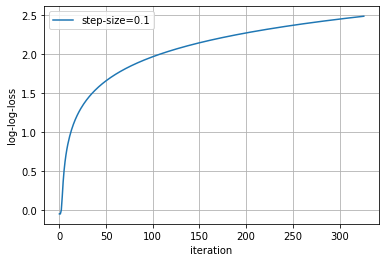

In [132]:
thetas, losses = batch_grad_descent(X_train, y_train)

plt.plot(range(1001),np.log10(np.log10(losses)), label='step-size=0.1')
plt.ylabel('log-log-loss')
plt.xlabel('iteration')
plt.grid()
plt.legend()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app


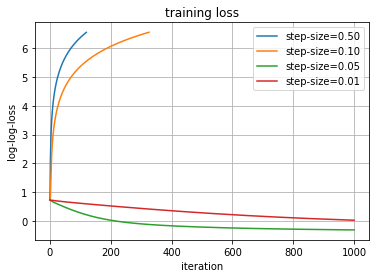

In [9]:
step_sizes = [0.5, 0.1, .05, .01]

for s in step_sizes:
    thetas, losses = batch_grad_descent(X_train, y_train,alpha=s)
    plt.plot(range(1001),np.log(np.log(losses)), label='step-size={:.2f}'.format(s))
plt.ylabel('log-log-loss')
plt.xlabel('iteration')
plt.title('training loss')
plt.grid()
plt.legend()


10. For the learning rate you selected above, plot the average test loss as a function of the iterations. You should observe overfitting: the test error first decreases and then increases.

<font color=purple size=3>Ans.</font>

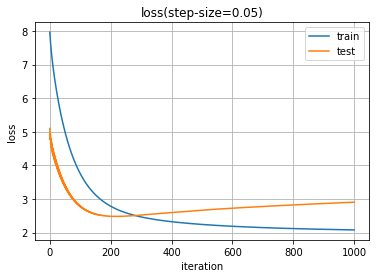

In [10]:
step_size = 0.05
thetas, losses = batch_grad_descent(X_train, y_train,alpha=step_size)

test_losses = np.zeros(losses.shape[0])
for n in range(losses.shape[0]):
    test_losses[n] = compute_square_loss(X_test, y_test, thetas[n])

plt.plot(range(losses.shape[0]),losses, label='train'.format(s))
plt.plot(range(losses.shape[0]),test_losses, label='test'.format(s))
plt.ylabel('loss')
plt.xlabel('iteration')
plt.title('loss(step-size=0.05)')
plt.grid()
plt.legend()

**<font color=purple size=3>Ridge Regression</font>**

11. Compute the gradient of $J_\lambda(\theta)$ and write down the expression for updating $\theta$ in the gradient descent algorithm. (Matrix/vector expression, without explicit summation)

<font color=purple size=3>Ans.</font>

<font color=purple size=2>$\nabla_{\theta} J(\theta)= \frac{2}{m} X^T(X\theta-y)+\lambda \nabla_{\theta}(\theta^{T}\theta)
=\frac{2}{m} X^T(X\theta-y) + 2 \lambda \theta$
</font>


12. Implement _compute\_regularized\_square\_loss\_gradient_

<font color=purple size=3>Ans.</font>



In [11]:
#######################################
### The gradient of regularized batch gradient descent
def compute_regularized_square_loss_gradient(X, y, theta, lambda_reg):
    """
    Compute the gradient of L2-regularized average square loss function given X, y and theta

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        theta - the parameter vector, 1D numpy array of size(num_features)
        lambda_reg - the regularization coefficient

    Returns:
        grad - gradient vector, 1D numpy array of size(num_features)
    """
    #TODO
    return 2*(X.T)@(X@theta-y)/X.shape[0]+2*lambda_reg*theta



13. Implement _regularized\_grad\_descent_

<font color=purple size=3>Ans.</font>

In [12]:
#######################################
### Regularized batch gradient descent
def regularized_grad_descent(X, y, alpha=0.05, lambda_reg=10**-2, num_step=1000):
    """
    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - step size in gradient descent
        lambda_reg - the regularization coefficient
        num_step - number of steps to run
    
    Returns:
        theta_hist - the history of parameter vector, 2D numpy array of size(num_step+1, num_features)
                     for instance, theta in step 0 should be theta_hist[0], theta in step(num_step+1) is theta_hist[-1]
        loss hist - the history of average square loss function without the regularization term, 1D numpy array.
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.zeros(num_features) #Initialize theta
    theta_hist = np.zeros((num_step+1, num_features)) #Initialize theta_hist
    loss_hist = np.zeros(num_step+1) #Initialize loss_hist
    #TODO
    for n in range(num_step):
        loss_hist[n] = compute_square_loss(X, y, theta)
        theta_hist[n] = theta
        grad = compute_regularized_square_loss_gradient(X, y, theta,lambda_reg=lambda_reg)
        theta = theta - alpha*grad
        #print(grad)
    loss_hist[num_step] = compute_square_loss(X, y, theta)
    theta_hist[num_step] = theta
    return theta_hist,loss_hist




14. Choosing a reasonable step-size, plot training average square loss and the test average square loss (just the average square loss part, without the regularization, in each case) as a function of the training iterations for various values of $\lambda$. What do you notice in terms of overfitting?


<font color=purple size=3>Ans.</font>

<font color=purple size=2>  The step size is fixed at 0.05 since it is selected in the previous experiment. $\lambda$ is chosen within $\left\{ 10^{-7},10^{-5},10^{-3},10^{-1},1,10,100\right\}$. 
    
    
Training and testing losses are computed through the previous defined _compute\_square\_loss_ which does not include the regularization. I chose to present 7 subplots, i.e. one plot for each $\lambda$, because of the vastly different scales in the loss values for different choices of $\lambda$.
    
    
Adding regularization helps alleviate the overfitting problem with a reasonable choice of $\lambda$. The degree of regularization cannot be either very small or very large. Too small $\lambda$ does not provide enough regularization to prevent overfitting, such as $\left\{ 10^{-7},10^{-5},10^{-3}\right\}$. Too large $\lambda$ causes the regularized gradient decent to diverge, such as $\left\{ 1,10,100\right\}$. 
    
</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


Text(0.5, 0, 'iteration')

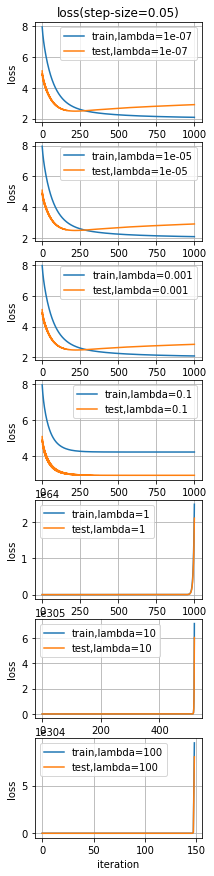

In [13]:
step_size=0.05

lambdas = [10**-7,10**-5,10**-3,0.1,1,10,100]

fig, axes = plt.subplots( len(lambdas),1,figsize=(3,15))
for i,l in enumerate(lambdas):
    thetas, losses = regularized_grad_descent(X_train, y_train,alpha=step_size,lambda_reg=l)

    test_losses = np.zeros(losses.shape[0])
    for n in range(losses.shape[0]):
        test_losses[n] = compute_square_loss(X_test, y_test, thetas[n])
    if i==0:
        axes[i].set_title('loss(step-size={})'.format(step_size))
    axes[i].plot(range(losses.shape[0]),losses, label='train,lambda={}'.format(l))
    axes[i].plot(range(losses.shape[0]),test_losses, label='test,lambda={}'.format(l))
    axes[i].set_ylabel('loss')
    axes[i].set_xlabel('iteration')
    axes[i].grid()
    axes[i].legend()
    
plt.xlabel('iteration')



15. Plot the training average square loss and the test average square loss at the end of training as a function of $\lambda$. You may want to have $\log(\lambda)$ on the $x$-axis rather than $\lambda$. Which value of $\lambda$ would you choose ?

<font color=purple size=3>Ans.</font>

<font color=purple size=2>  The step size is fixed at 0.05 since it is selected in the previous experiment. $\lambda$ is chosen within $\left\{ 10^{-7},10^{-5},10^{-3},10^{-1},1,10,100\right\}$. 
    
    
The x-axis represents $log10(\lambda)$ and y-axis represents the final average square loss.
    
    
I would choose $\lambda=10^{-3}$ because it has the smallest testing loss in this experiment. What's worth mentioning is that, I believe $\lambda=10^{-1}$ is a reasonable choice as well since the loss value is not very far from the minimum and we don't have overfitting with $\lambda=10^{-1}$. More experiments adjusting the number of iterations or zooming in on $\lambda \in [10^{-3},10^{-1}]$ would provide better result.
    
</font>

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


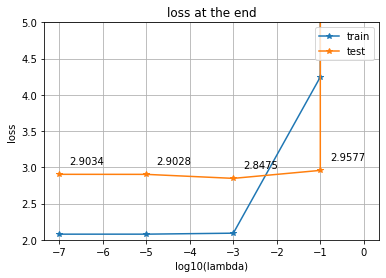

In [14]:
final_train_loss = []
final_test_loss = []
for i,l in enumerate(lambdas):
    thetas, losses = regularized_grad_descent(X_train, y_train,alpha=step_size,lambda_reg=l)
    final_train_loss.append(losses[~np.isnan(losses)][-1])
    test_losses = np.zeros(losses.shape[0])
    for n in range(losses.shape[0]):
        test_losses[n] = compute_square_loss(X_test, y_test, thetas[n])
    final_test_loss.append(test_losses[~np.isnan(losses)][-1])
    
plt.plot(np.log10(np.array(lambdas)),final_train_loss,marker='*',label='train')
plt.plot(np.log10(np.array(lambdas)),final_test_loss,marker='*',label='test')

for xy in zip(np.log10(np.array(lambdas)), final_test_loss):
    #print(xy)
    if xy[1]<5:
        plt.annotate("{:.4f}".format(xy[1]), xy=xy, xytext=(10, 10), textcoords='offset points')

plt.xlabel('log10(lambda)')
plt.ylabel('loss')

plt.title('loss at the end')
plt.ylim([2,5])
plt.grid()
plt.legend()

In [15]:
print(final_test_loss,final_train_loss)

[2.903417575953723, 2.90283453022427, 2.847542512245564, 2.9577109710762675, 2.1057950195913632e+64, inf, inf] [2.0777006144263006, 2.0778239254952293, 2.091350000759597, 4.24581158285046, 2.4907665006409817e+64, inf, inf]


16. Another heuristic of regularization is to _early-stop_ the training when the test error reaches a minimum. Add to the last plot the minimum of the test average square loss along training as a function of $\lambda$. Is the value $\lambda$ you would select with early stopping the same as before? 

<font color=purple size=3>Ans.</font>

<font color=purple size=2>  The step size is fixed at 0.05 since it is selected in the previous experiment. $\lambda$ is chosen within $\left\{ 10^{-7},10^{-5},10^{-3},10^{-1},1,10,100\right\}$. 
    
    
The x-axis represents $log10(\lambda)$ and y-axis represents the final average square loss.
    
    
I would choose $\lambda=10^{-1}$ this time. It is different with the previous version. When we take early stopping into consideration, we see $\lambda=10^{-1}$ has the final testing error very close to(perhaps equal to) the minimum loss during the training process, which implies little overfitting. However, $\lambda=10^{-3}$ has larger loss at the end, which implies overfitting. Thus $\lambda=10^{-1}$ is a better choice.
    
</font>




/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in matmul
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in matmul
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in matmul


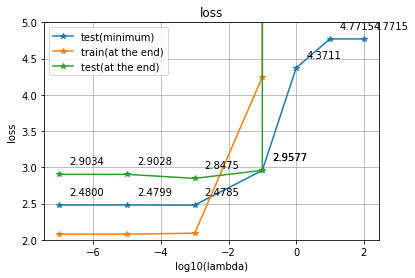

In [16]:
min_test_loss = []
for i,l in enumerate(lambdas):
    thetas, losses = regularized_grad_descent(X_train, y_train,alpha=step_size,lambda_reg=l)
    test_losses = np.zeros(losses.shape[0])
    for n in range(losses.shape[0]):
        test_losses[n] = compute_square_loss(X_test, y_test, thetas[n])
    min_test_loss.append(np.nanmin(test_losses))
    
plt.plot(np.log10(np.array(lambdas)),min_test_loss,marker='*',label='test(minimum)')
plt.plot(np.log10(np.array(lambdas)),final_train_loss,marker='*',label='train(at the end)')
plt.plot(np.log10(np.array(lambdas)),final_test_loss,marker='*',label='test(at the end)')

for xy in zip(np.log10(np.array(lambdas)), final_test_loss):
    #print(xy)
    if xy[1]<5:
        plt.annotate("{:.4f}".format(xy[1]), xy=xy, xytext=(10, 10), textcoords='offset points')


for xy in zip(np.log10(np.array(lambdas)), min_test_loss):
    #print(xy)
    if xy[1]<5:
        plt.annotate("{:.4f}".format(xy[1]), xy=xy, xytext=(10, 10), textcoords='offset points')

plt.xlabel('log10(lambda)')
plt.ylabel('loss')


plt.title('loss')
plt.ylim([2,5])
plt.grid()
plt.legend()

17. What $\theta$ would you select in practice and why?

<font color=purple size=3>Ans.</font>

<font color=purple size=2>  The step size is fixed at 0.05 since it is selected in the previous experiment. $\lambda$ is chosen within $\left\{ 10^{-7},10^{-5},10^{-3},10^{-1},1,10,100\right\}$. 
    
Given above experiments, especially taking early stopping and the risk of overfitting into consideration, I would choose the $\theta$ with $\lambda=10^{-1}$ after the iterations. Please see the values in the output columns below.
    
</font>


In [17]:
lambda_best=0.1
thetas, losses = regularized_grad_descent(X_train, y_train,alpha=step_size,lambda_reg=lambda_best)
thetas[-1]

array([-0.6942071 ,  0.241511  ,  0.75195162,  1.00684603, -0.65532051,
       -0.4319623 , -0.39212343, -0.39212343,  0.30729047,  0.78039488,
        1.0561961 , -0.08462613, -0.92201464, -1.79066894,  0.81023849,
        1.19594798,  0.85791394,  0.20005004, -0.06576256, -0.06576256,
       -0.06576256, -0.00589814, -0.00589814, -0.00589814,  0.01710682,
        0.01710682,  0.01710682,  0.02804552,  0.02804552,  0.02804552,
        0.0342033 ,  0.0342033 ,  0.0342033 ,  0.0147728 ,  0.0147728 ,
        0.0147728 ,  0.09249565,  0.09249565,  0.09249565,  0.07428176,
        0.07428176,  0.07428176,  0.06590111,  0.06590111,  0.06590111,
        0.06126529,  0.06126529,  0.06126529, -0.8596435 ])

## Stochastic Gradient Descent (SGD) (optional)

18. Show that the objective function $J_{\lambda}(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left(h_{\theta}(x_{i})-y_{i}\right)^{2}+\lambda\theta^{T}\theta$ can be written in the form $J_\lambda(\theta)=\frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$ by giving an expression for $f_{i}(\theta)$ that makes the two expressions equivalent.


<font color=purple size=3>Ans.</font>


<font color=purple size=2>  
$f_{i}(\theta) = \left(h_{\theta}(x_{i})-y_{i}\right)^{2} + \lambda \theta_i^2$
    
</font>



19. Show that the stochastic gradient $\nabla_\theta f_{i}(\theta)$, for $i$ chosen uniformly at random from $\{1,\ldots,m\}$, is an _unbiased estimator_ of $\nabla_\theta J_\lambda(\theta)$. In other words, show that $\mathbb{E}\left[\nabla f_{i}(\theta)\right]=\nabla J_\lambda(\theta)$ for any $\theta$. It will be easier to prove this for a general $J(\theta)=\frac{1}{m}\sum_{i=1}^{m}f_{i}(\theta)$, rather than the specific case of ridge regression. You can start by writing down an expression for $\mathbb{E}\left[\nabla f_{i}(\theta)\right]$

<font color=purple size=3>Ans.</font>


<font color=purple size=2>  
$\mathbb{E}\left[\nabla f_{i}(\theta)\right] = \sum_{k=1}^{m}\nabla f_{k}(\theta) P(i=k)=\sum_{k=1}^{m}\nabla f_{k}(\theta) \frac{1}{m} = \frac{1}{m}\sum_{i=1}^{m}\nabla_\theta f_{i}(\theta)=\nabla_\theta J_\lambda(\theta)$
</font>


20. Write down the update rule for $\theta$ in SGD for the ridge regression objective function.

<font color=purple size=3>Ans.</font>


<font color=purple size=2>  
Randomly choose $i \in [1,m]$

    
$\theta_{new} = \theta_{old} - \alpha \nabla f_{i}(\theta)
=\theta_{old} - 2\alpha [\left(h_{\theta}(x_{i})-y_{i}\right)- \theta_i] $
</font>



21. Implement _stochastic\_grad\_descent_. 

<font color=purple size=3>Ans.</font>



In [126]:

#######################################
### Stochastic gradient descent
def stochastic_grad_descent(X, y, alpha=0.01, lambda_reg=10**-2, num_epoch=1000, eta0=False):
    """
    In this question you will implement stochastic gradient descent with regularization term

    Args:
        X - the feature vector, 2D numpy array of size(num_instances, num_features)
        y - the label vector, 1D numpy array of size(num_instances)
        alpha - string or float, step size in gradient descent
                NOTE: In SGD, it's not a good idea to use a fixed step size. Usually it's set to 1/sqrt(t) or 1/t
                if alpha is a float, then the step size in every step is the float.
                if alpha == "1/sqrt(t)", alpha = 1/sqrt(t).
                if alpha == "1/t", alpha = 1/t.
        lambda_reg - the regularization coefficient
        num_epoch - number of epochs to go through the whole training set

    Returns:
        theta_hist - the history of parameter vector, 3D numpy array of size(num_epoch, num_instances, num_features)
                     for instance, theta in epoch 0 should be theta_hist[0], theta in epoch(num_epoch) is theta_hist[-1]
        loss hist - the history of loss function vector, 2D numpy array of size(num_epoch, num_instances)
    """
    num_instances, num_features = X.shape[0], X.shape[1]
    theta = np.ones(num_features) #Initialize theta

    theta_hist = np.zeros((num_epoch, num_instances, num_features)) #Initialize theta_hist
    loss_hist = np.zeros((num_epoch, num_instances)) #Initialize loss_hist
    
    
    for e in range(num_epoch):
        for t in range(num_instances):
            theta_hist[e][t] = theta
            loss_hist[e][t] = compute_square_loss(X, y, theta)  
            i = np.random.randint(0, high=num_instances, size=1, dtype=int)
            grad = compute_regularized_square_loss_gradient(X[i].reshape(1, X.shape[1]), y[i], theta,lambda_reg=lambda_reg)
            if alpha == "1/sqrt(t)": 
                alpha_t = 1/np.sqrt(t+1)#avoid zero division
            elif alpha == "1/t":
                alpha_t = 1/(t+1)
            else:
                alpha_t = alpha
            theta = theta - alpha_t*grad
            #print(grad)
        
    return theta_hist,loss_hist
    


22. Use SGD to find $\theta_{\lambda}^{*}$ that minimizes the ridge regression objective for the $\lambda$ you selected in the previous problem. (If you could not solve the previous problem, choose $\lambda=10^{-2}$). Try a few fixed step sizes (at least try $\eta_{t}\in\left\{ 0.05,.005\right\} $). Note that SGD may not converge with fixed step size. Simply note your results. Next try step sizes that decrease with the step number according to the following schedules: $\eta_{t}=\frac{C}{t}$ and $\eta_{t}=\frac{C}{\sqrt{t}}$, $C \leq 1$. Please include $C = 0.1$ in your submissions. You are encouraged to try different values of $C$ (see notes below for details). For each step size rule, plot the value of the objective function(or the log of the objective function if that is more clear) as a function of epoch (or step number, if you prefer). How do the results compare?

<font color=purple size=3>Ans.</font>

## 2 Image classification with regularized logistic regression

**<font color=purple size=3>Logistic Regression</font>**


23. Recall the definition of the logistic loss between target $y$ and a prediction $h_{\theta, b}(\textbf{x})$ as a function of the margin $m = y h_{\theta, b}(\textbf{x})$. Show that given that we chose the convention $y_i\in\{-1,1\}$, our objective function over the training data $\{x_i, y_i\}_{i=1}^m$ can be re-written as  $L(\theta) = \frac 1 {2 m} \sum_{i=1}^m  (1 + y_i) \log ( 1 + e^{- h_{\theta,b} \,( x_i)}) +  (1 - y) \log(1 + e^{h_{\theta,b}\, (x_i)})$


<font color=purple size=3>Ans.</font>

<font color=purple size=2> 
Standard Logistic Loss = 
$SL(\theta) =\prod_{i=1}^m P_\theta(x_i)^{y_i} (1-P_\theta(x_i))^{1-y_i}$,

where $P_\theta(x_i)=P(y_i=1 \| x_i, \theta)= \frac {1} {1+e^{h_{\theta,b(x_i)}}}$ 

(The word _standard_ refers to $y_i\in\{0,1\}$).

    
If we choose to let $y_i\in\{-1,1\}$, then we can let the new loss
$Loss(\theta) =\prod_{i=1}^m P_\theta(x_i)^{\frac{1+y_i}{2}} (1-P_\theta(x_i))^{\frac{1-y_i}{2}}$
    
By taking negative logarithm transform of this $Loss(\theta)$ and averaging the result, we have 
$L(\theta) = -\frac 1 {2 m} \sum_{i=1}^m  (1 + y_i) \log (P_\theta(x_i)^{y_i}) +  (1 - y_i) \log(1-P_\theta(x_i)^{y_i})$,
    
i.e.
$L(\theta)= \frac 1 {2 m} \sum_{i=1}^m  (1 + y_i) \log ( 1 + e^{- h_{\theta,b} \,( x_i)}) +  (1 - y) \log(1 + e^{h_{\theta,b}\, (x_i)}) $
    
   
</font>


24. What will become the loss function if we regularize the coefficients of $\theta$ with an $\ell_1$ penalty using a regularization parameter $\alpha$ ?

<font color=purple size=3>Ans.</font>

<font color=purple size=2> 
    $L(\theta) = \frac 1 {2 m} \sum_{i=1}^m  (1 + y_i) \log ( 1 + e^{- h_{\theta, b}\,( x_i)}) +  (1 - y) \log(1 + e^{h_{\theta, b}\,(x_i)}) + \alpha \| \theta_i \|_{1}$ 

where $\| \theta_i \|_{1}$ = $\sum_{i=1}^m |\theta_i|$
    
</font>



25. To evaluate the quality of our model we will use the classification error, which corresponds to the fraction of incorrectly labeled examples. For a given sample, the classification error is 1 if no example was labeled correctly and 0 if all examples were perfectly labeled. Using the method _clf.predict()_ from the classifier write a function that takes as input an _SGDClassifier_ which we will call _clf_, a design matrix _X_ and a target vector _y_ and returns the classification error. You should check that your function returns the same value as _1-clf.score(X, y)_.

<font color=purple size=3>Ans.</font>

In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def pre_process_mnist_01():
    """
    Load the mnist datasets, selects the classes 0 and 1 
    and normalize the data.
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    X_mnist, y_mnist = fetch_openml('mnist_784', version=1, 
                                    return_X_y=True, as_frame=False)
    indicator_01 = (y_mnist == '0') + (y_mnist == '1')
    X_mnist_01 = X_mnist[indicator_01]
    y_mnist_01 = y_mnist[indicator_01]
    X_train, X_test, y_train, y_test = train_test_split(X_mnist_01, y_mnist_01,
                                                        test_size=0.33,
                                                        shuffle=False)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train) 
    X_test = scaler.transform(X_test)

    y_test = 2 * np.array([int(y) for y in y_test]) - 1
    y_train = 2 * np.array([int(y) for y in y_train]) - 1
    return X_train, X_test, y_train, y_test


def sub_sample(N_train, X_train, y_train):
    """
    Subsample the training data to keep only N first elements
    Args: none
    Outputs: 
        X_train: np.array of size (n_training_samples, n_features)
        X_test: np.array of size (n_test_samples, n_features)
        y_train: np.array of size (n_training_samples)
        y_test: np.array of size (n_test_samples)
    """
    assert N_train <= X_train.shape[0]
    return X_train[:N_train, :], y_train[:N_train]




X_train, X_test, y_train, y_test = pre_process_mnist_01()



In [22]:
clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=0.01, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    verbose=1)
clf.fit(X_train, y_train)


def classification_error(clf, X, y):
    pred_y = clf.predict(X) 
    return (pred_y!=y).sum()/y.shape[0]

test = classification_error(clf, X_test, y_test)
train = classification_error(clf, X_train, y_train)

print('my_train_classification_error:{:4f},\
        built-in-version:{:4f} \n'.\
        format(train,1-clf.score( X_train, y_train)))

print('my_test_classification_error:{:4f},\
        built-in-version:{:4f} \n'.\
        format(test,1-clf.score( X_test, y_test)))

-- Epoch 1
Norm: 0.72, NNZs: 284, Bias: 0.020273, T: 9902, Avg. loss: 0.042410
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 0.80, NNZs: 259, Bias: 0.020074, T: 19804, Avg. loss: 0.032083
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 0.86, NNZs: 248, Bias: 0.020112, T: 29706, Avg. loss: 0.030438
Total training time: 0.18 seconds.
-- Epoch 4
Norm: 0.91, NNZs: 235, Bias: 0.020252, T: 39608, Avg. loss: 0.029460
Total training time: 0.24 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 229, Bias: 0.020468, T: 49510, Avg. loss: 0.028888
Total training time: 0.31 seconds.
-- Epoch 6
Norm: 0.98, NNZs: 226, Bias: 0.020739, T: 59412, Avg. loss: 0.028490
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 1.01, NNZs: 217, Bias: 0.021048, T: 69314, Avg. loss: 0.028190
Total training time: 0.42 seconds.
-- Epoch 8
Norm: 1.03, NNZs: 211, Bias: 0.021377, T: 79216, Avg. loss: 0.027869
Total training time: 0.48 seconds.
Convergence after 8 epochs took 0.48 seconds
my_train_classification_error:0.0022

26. Report the test classification error achieved by the logistic regression as a function of the regularization parameters $\alpha$ (taking 10 values between $10^{-4}$ and $10^{-1}$). You should make a plot with $\alpha$ as the x-axis in log scale. For each value of $\alpha$, you should repeat the experiment 10 times so has to finally report the mean value and the standard deviation. You should use _plt.errorbar_ to plot the standard deviation as error bars.

<font color=purple size=3>Ans.</font>




In [46]:
alpha_list = []
test_error_mean = []
test_error_std = []
repeat = 10
clfs = {}
for i in np.linspace(-4, -1, num=10):
    alpha=10**(i)
    alpha_list.append(alpha)
    
    temp_test_error = []
    for n in range(repeat):
        clf = SGDClassifier(loss='log', max_iter=1000, 
                    tol=1e-3,
                    penalty='l1', alpha=alpha, 
                    learning_rate='invscaling', 
                    power_t=0.5,                
                    eta0=0.01,
                    #verbose=1
                    )
        clf.fit(X_train, y_train)
        clfs[str(alpha)]=clf
        temp_test_error.append(classification_error(clf, X_test, y_test))
    test_error_mean.append(np.mean(temp_test_error))
    test_error_std.append(np.std(temp_test_error))



Text(0, 0.5, 'loss')

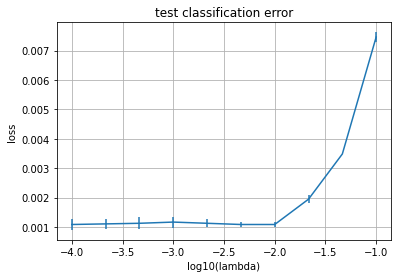

In [48]:
#plt.plot(np.log10(alpha_list),test_error_mean,label='mean test classification error')

plt.errorbar(np.log10(alpha_list),test_error_mean,
             yerr=test_error_std)
 
plt.title('test classification error')
plt.grid()
plt.xlabel('log10(lambda)')
plt.ylabel('loss')



In [45]:
for i in range(len(test_error_mean)):
    print('alpha={:4f},\n \t mean test classification error={:6f}+-{:4f}'.format(alpha_list[i],test_error_mean[i],test_error_std[i]))
    #print('\t mean minus std={:6f}'.format(test_error_mean[i]-test_error_std[i]))

    

alpha=0.000100,
 	 mean test classification error=0.001107+-0.000136
alpha=0.000215,
 	 mean test classification error=0.001005+-0.000193
alpha=0.000464,
 	 mean test classification error=0.001230+-0.000290
alpha=0.001000,
 	 mean test classification error=0.001148+-0.000136
alpha=0.002154,
 	 mean test classification error=0.001046+-0.000062
alpha=0.004642,
 	 mean test classification error=0.001128+-0.000138
alpha=0.010000,
 	 mean test classification error=0.001107+-0.000100
alpha=0.021544,
 	 mean test classification error=0.001907+-0.000131
alpha=0.046416,
 	 mean test classification error=0.003506+-0.000144
alpha=0.100000,
 	 mean test classification error=0.007606+-0.000144


27. Which source(s) of randomness are we averaging over by repeating the experiment?

<font color=purple size=3>Ans.</font>

<font color=purple size=2> 
   It reduces the effect of random errors during each experiment introduced by SGD's different data usage each time. 
    
</font>


28. What is the optimal value of the parameter $\alpha$ among the values you tested? 

<font color=purple size=3>Ans.</font>

<font color=purple size=2> 
$\alpha \in [10^{-4},10^{-1}]$ and the 10-logarithmic of $\alpha$ is evenly distributed in [-4,-1]. In other words, $\alpha$ is chosen from $\{10^{-4},10^{-3\frac{2}{3}},10^{-3\frac{1}{3}},10^{-3},10^{-2\frac{2}{3}},10^{-2\frac{1}{3}},10^{-2},10^{-1\frac{2}{3}},10^{-1\frac{1}{3}},10^{-1}\}$.

The optimal $\alpha$ is $\alpha= 10^{-3\frac{2}{3}}=0.000215$ since it has the lowest mean and the lowest mean minus std value.
    
</font>

29. Finally, for one run of the fit for each value of $\alpha$ plot the value of the fitted $\theta$. You can access it via _clf.coef_, and should reshape the $764$ dimensional vector to a $28\times 28$ array to visualize it with _plt.imshow_. Defining _scale = np.abs(clf.coef).max()_, you can use the following keyword arguments (_cmap=plt.cm.RdBu, vmax=scale, vmin=-scale_) which will set the colors nicely in the plot. You should also use a _plt.colorbar()_ to visualize the values associated with the colors.

<font color=purple size=3>Ans.</font>


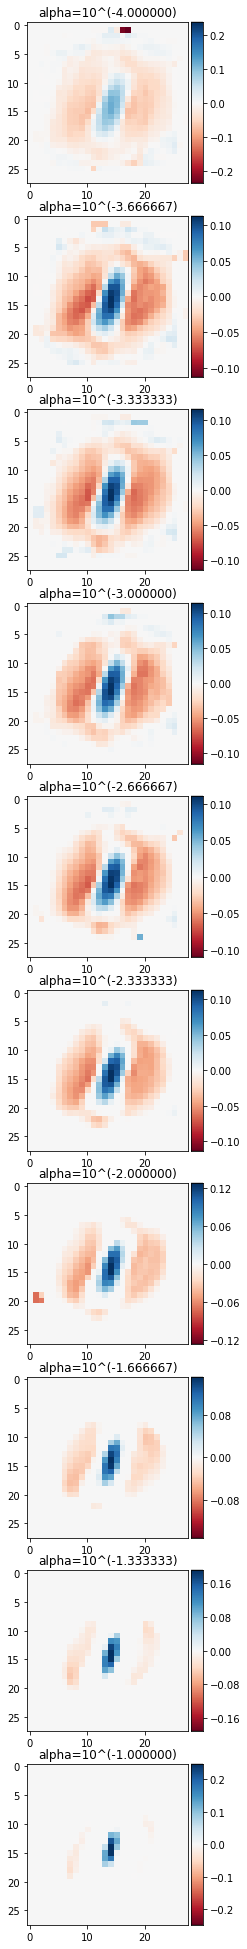

In [71]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar

scale = {}

fig, axes = plt.subplots( len(alpha_list),1,figsize=(5,35))

for i,a in enumerate(alpha_list):
    scale[str(a)] = np.abs(clfs[str(a)].coef_).max()
    theta_arr = clfs[str(a)].coef_.reshape((28,28))
    c = axes[i].imshow(theta_arr,cmap=plt.cm.RdBu, \
               vmax=scale[str(a)],\
               vmin=-scale[str(a)])
    ax_divider = make_axes_locatable(axes[i])
    cax1 = ax_divider.append_axes("right", size="7%", pad="2%")
    cb1 = colorbar(c, cax=cax1)
    axes[i].set_title('alpha=10^({:4f})'.format(np.log10(a))) 
    #axes[i].colorbar(c) 
    
    
    

30. What can you note about the pattern in $\theta$? What can you note about the effect of the regularization?

<font color=purple size=3>Ans.</font>

<font color=purple size=2> 
Although the maximum of $|\theta_i|$ varies for each choice of $\alpha$, we see a shrinkage on the red/blue area as $\alpha$ grows, except for $\alpha=10^{-4}$. This implies less pixels are used to predict the class. Besides, for the colored points, the colors become lighter with larger $\alpha$.
    
The regularization prevents overfitting and plays the role of feature selection. Regularization here pushes the weights closer to 0, thus reducing the maximum rate of change for the classifier. With $\ell_1$ penalty, some pixels are assigned with a weight of 0, i.e. less important features are ignored. 
    
</font>